importing datasets

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

loading datasets

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

In [ ]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Handling Missing values

In [ ]:
print(" For Missing Values" )
df.isnull().sum()

 For Missing Values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Features

In [ ]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
data_dummies = pd.get_dummies(df, drop_first=True)
data_dummies['result'] = (df['Outcome'] > 1).astype(int)

In [ ]:
X = data_dummies.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], axis=1)
Y = data_dummies['result']

EDA

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


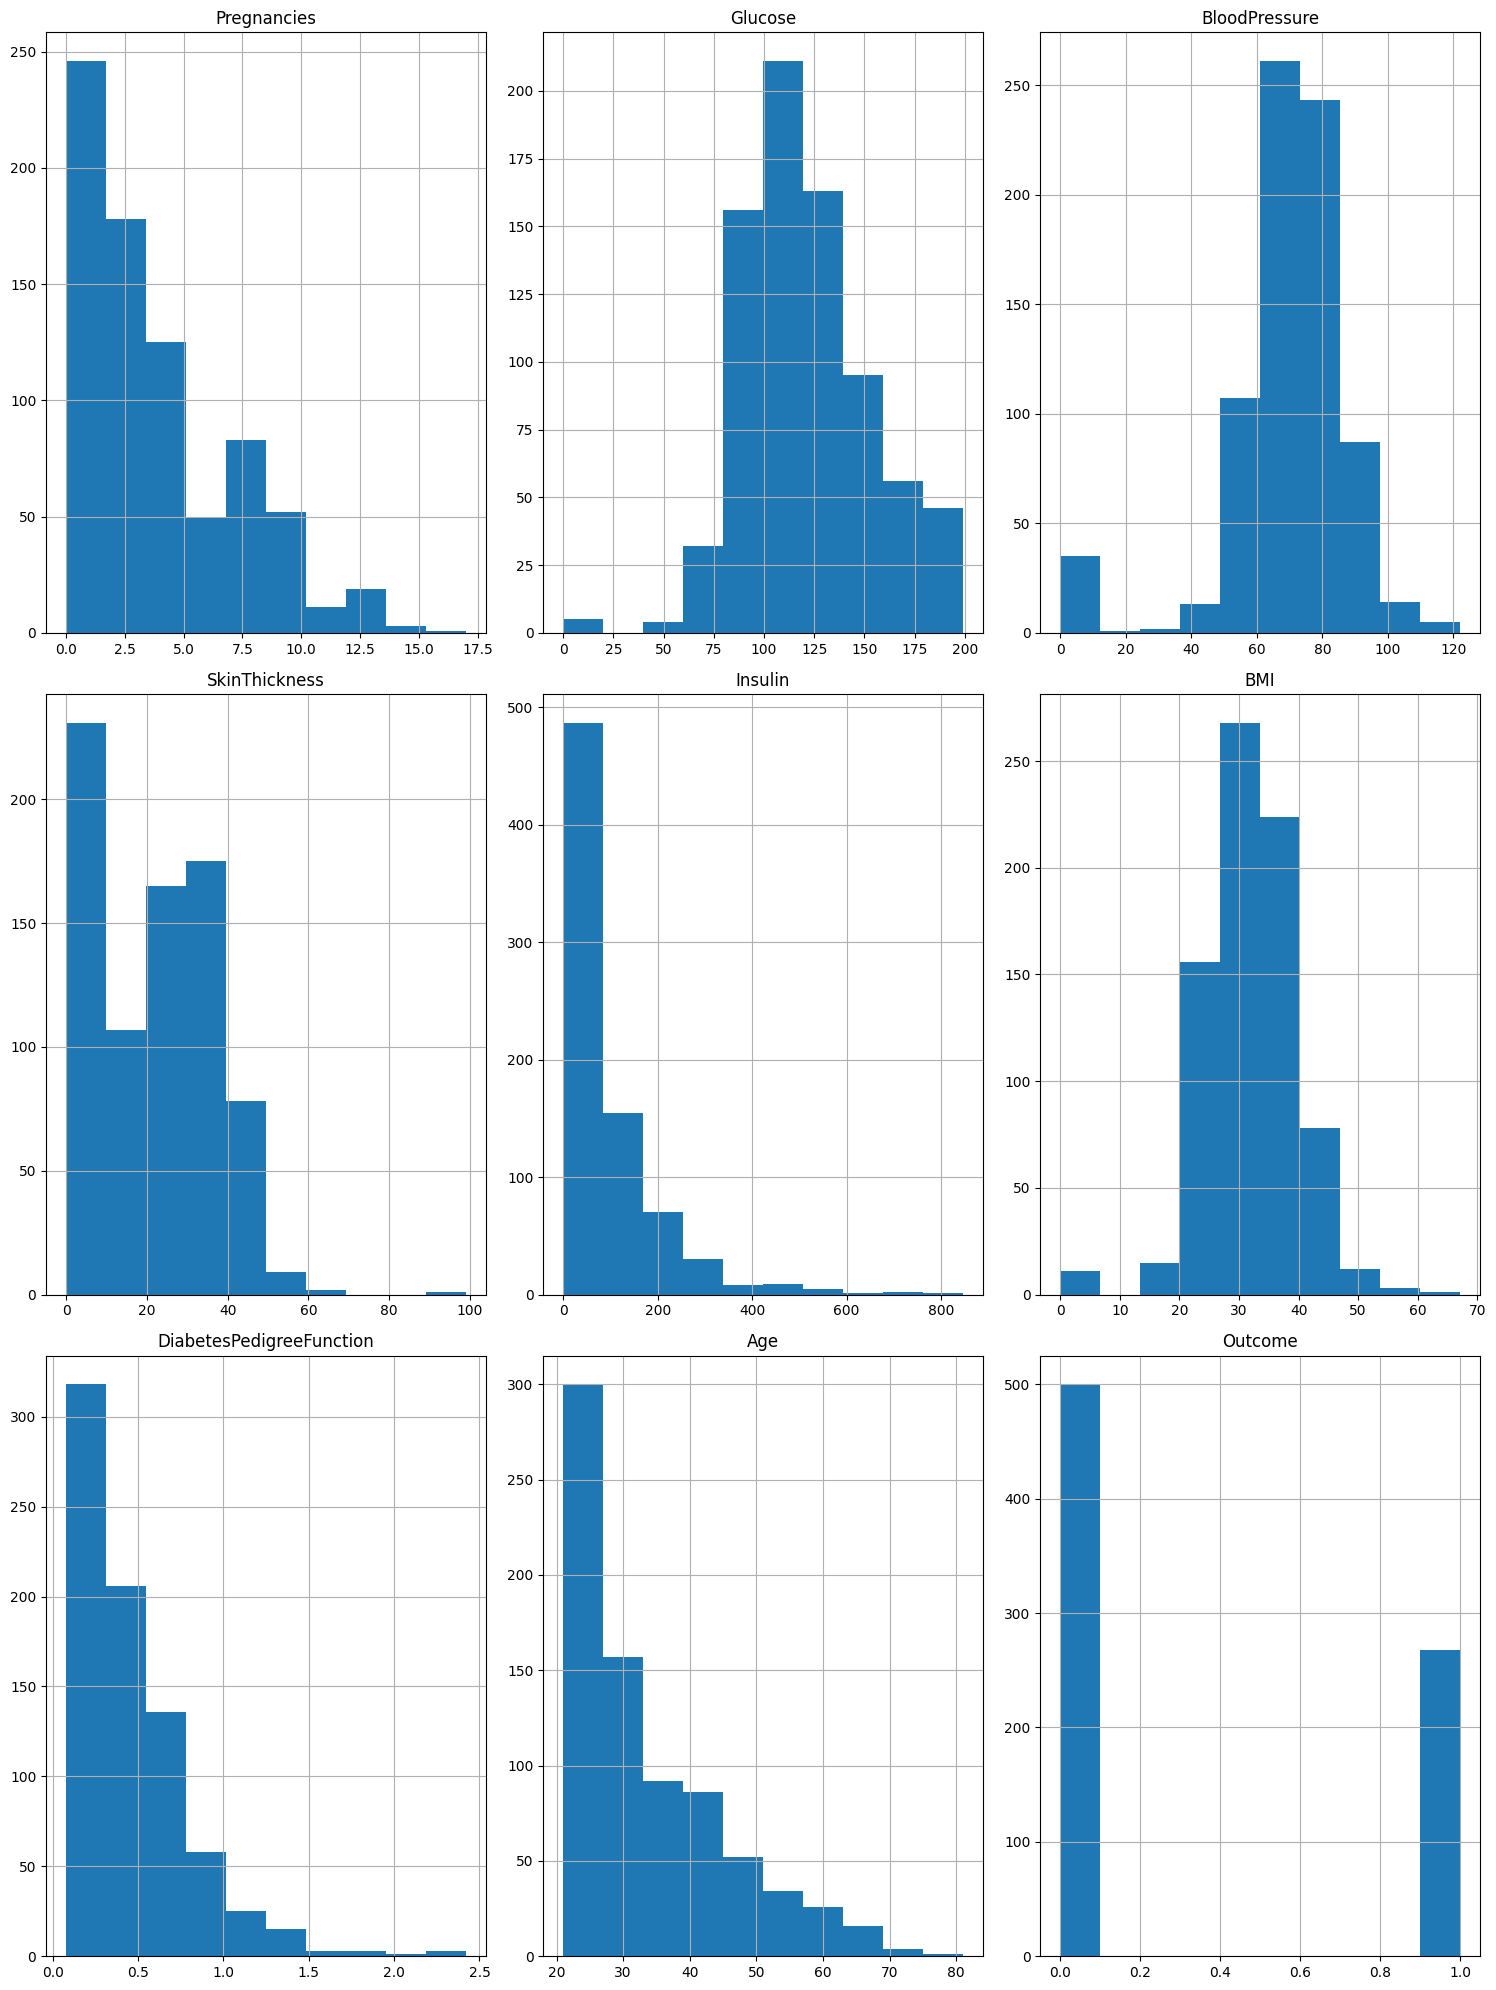

In [ ]:
df.hist(figsize=(15, 20))
plt.tight_layout()
plt.show()

Linear regression

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LINEAR REGRESSION

THeory Recap- used to show the model between a dependent variale and one or more independent variable often used for prediction and forecasting in the following fields economics and finance

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
coefficient = model.coef_
print("Slope: ", slope)
print("Intercept:", intercept)
print("Coefficients:", coefficient)

Slope:  [ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
 -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]
Intercept: [-8.365745]
Coefficients: [[ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
  -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]]


In [ ]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.3264563409414202
Mean Squared Error (MSE): 0.15464012580426573
Root Mean Squared Error (RMSE): 0.393243087420829


LOGISTICS REGRESSION

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

data splitting 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression

Theory Recap - Logistics Regression is used for binary classification tasks where there are only two possible outcomes and is mostly used in healthcare, marketing, and finance



In [ ]:
model = LogisticRegression(max_iter=2000)
model.fit(X, y)

LogisticRegression(max_iter=2000)

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
coefficient = model.coef_
print("Slope: ", slope)
print("Intercept:", intercept)
print("Coefficients:", coefficient)

Slope:  [ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
 -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]
Intercept: [-8.365745]
Coefficients: [[ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
  -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]]


In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Evaluation Metrics:
Accuracy: 0.7857142857142857
Precision: 0.7115384615384616
Recall: 0.6727272727272727
F1 Score: 0.6915887850467289


Model Comparison and Selection

In Linear regression the R value is low amounting only to 32.65% while the Logistics regression achieved an accuracy of 78.57%  

When comparing the two to see which one is more appropriate then the correct choice would be the Logistics regression

Conclusions and Insights

In this case study we looked at the results of the two models used Linear Regression and Logistics Regression. Wherein the logistics regression showed low performance rate showing how it isnt suitable for classifying patients as diabetic or non diabetic  unlike the logistics regression which showed a high accuracy and excellent performance in classifying them which shows that it is important to choose the right model to ensure that the data fits the model with both excelling on one thing.

Logistics regression can be used in various fields most prominent is in healthcare whole other fields are finance, marketing. another insight I gained is

References

Diabetes Dataset for Beginners. (2022, February 25). Kaggle. https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

pandas
numpy
seaborn
plotly
matplotlib
